# Importing libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!ls *.csv

application_test.csv  application_train.csv


In [3]:
train_df = pd.read_csv('application_train.csv')

In [4]:
train_df.shape

(307511, 122)

<p> Looks like we have 122 columns which is big, We must apply feature selection, dimentionality reduction techniques.</p>

<hr>

# A bird eye view of Dataset

In [5]:
train_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
train_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [7]:
# Looks like we have 106 numerical columns as pd.describe only takes numerical features
str(122-106) + " non numerical columns"

'16 non numerical columns'

In [8]:
train_df.dtypes[train_df.dtypes == 'object'].shape

(16,)

<p> We have 16 columns with non numerical values. The values in these columns must be encoded.</p>

In [9]:
train_df.dtypes[train_df.dtypes == 'object']

NAME_CONTRACT_TYPE            object
CODE_GENDER                   object
FLAG_OWN_CAR                  object
FLAG_OWN_REALTY               object
NAME_TYPE_SUITE               object
NAME_INCOME_TYPE              object
NAME_EDUCATION_TYPE           object
NAME_FAMILY_STATUS            object
NAME_HOUSING_TYPE             object
OCCUPATION_TYPE               object
WEEKDAY_APPR_PROCESS_START    object
ORGANIZATION_TYPE             object
FONDKAPREMONT_MODE            object
HOUSETYPE_MODE                object
WALLSMATERIAL_MODE            object
EMERGENCYSTATE_MODE           object
dtype: object

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [11]:
#sns.heatmap(train_df.corr())

In [12]:
train_df[['TARGET']].value_counts()

TARGET
0         282686
1          24825
dtype: int64

<p> The target looks imbalanced. </p>

<AxesSubplot:xlabel='TARGET', ylabel='count'>

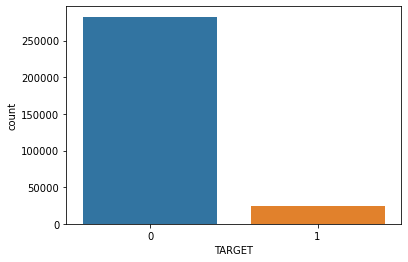

In [13]:
sns.countplot(x='TARGET',data=train_df)

<hr>

# Dealing with NaN Values

In [14]:
train_df.isna().sum() != 0

SK_ID_CURR                    False
TARGET                        False
NAME_CONTRACT_TYPE            False
CODE_GENDER                   False
FLAG_OWN_CAR                  False
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY      True
AMT_REQ_CREDIT_BUREAU_WEEK     True
AMT_REQ_CREDIT_BUREAU_MON      True
AMT_REQ_CREDIT_BUREAU_QRT      True
AMT_REQ_CREDIT_BUREAU_YEAR     True
Length: 122, dtype: bool

In [15]:
# no of columns
train_df.columns.shape

(122,)

In [16]:
# no of columns with nan values
train_df.columns[train_df.isna().sum() != 0].shape

(67,)

In [17]:
cols_with_nan = train_df.columns[train_df.isna().sum() != 0]

<p>67 Columns have NaN values.</p>

<hr>

# Dealing with Null values, if any

In [18]:
train_df.isnull().sum() != 0

SK_ID_CURR                    False
TARGET                        False
NAME_CONTRACT_TYPE            False
CODE_GENDER                   False
FLAG_OWN_CAR                  False
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY      True
AMT_REQ_CREDIT_BUREAU_WEEK     True
AMT_REQ_CREDIT_BUREAU_MON      True
AMT_REQ_CREDIT_BUREAU_QRT      True
AMT_REQ_CREDIT_BUREAU_YEAR     True
Length: 122, dtype: bool

In [19]:
train_df.columns[train_df.isnull().sum() != 0].shape

(67,)

In [20]:
all(train_df.columns[train_df.isna().sum() != 0] == train_df.columns[train_df.isnull().sum() != 0])

True

<p>Looks like NaN values and Null values represent same in case of our dataset and there are 67 of them. </p>

<hr>

# Columns with Null/NaN values with count

In [21]:
# for c in train_df.columns[train_df.isna().sum() != 0]:
#     print(c," ",train_df[c].isna().sum())

In [64]:
for col,no_of_nans in train_df[train_df.columns[train_df.isna().sum() != 0]].isna().sum().sort_values(ascending=False).iteritems():
    print(col,no_of_nans/train_df.shape[0]*100)


COMMONAREA_MEDI 69.87229725115525
COMMONAREA_AVG 69.87229725115525
COMMONAREA_MODE 69.87229725115525
NONLIVINGAPARTMENTS_MEDI 69.43296337366793
NONLIVINGAPARTMENTS_MODE 69.43296337366793
NONLIVINGAPARTMENTS_AVG 69.43296337366793
FONDKAPREMONT_MODE 68.38617155158677
LIVINGAPARTMENTS_MODE 68.35495315614726
LIVINGAPARTMENTS_MEDI 68.35495315614726
LIVINGAPARTMENTS_AVG 68.35495315614726
FLOORSMIN_MODE 67.84862980511267
FLOORSMIN_MEDI 67.84862980511267
FLOORSMIN_AVG 67.84862980511267
YEARS_BUILD_MODE 66.49778381911543
YEARS_BUILD_MEDI 66.49778381911543
YEARS_BUILD_AVG 66.49778381911543
OWN_CAR_AGE 65.9908100848425
LANDAREA_AVG 59.376737742714894
LANDAREA_MEDI 59.376737742714894
LANDAREA_MODE 59.376737742714894
BASEMENTAREA_MEDI 58.51595552679416
BASEMENTAREA_AVG 58.51595552679416
BASEMENTAREA_MODE 58.51595552679416
EXT_SOURCE_1 56.381072546998325
NONLIVINGAREA_MEDI 55.17916432257708
NONLIVINGAREA_MODE 55.17916432257708
NONLIVINGAREA_AVG 55.17916432257708
ELEVATORS_MEDI 53.29597965601231
ELEV

<hr>

# Columns names with int, float and object

In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [24]:
int_cols_name = train_df.columns[train_df.dtypes=='int64']
int_cols_name.shape

(41,)

In [25]:
float_cols_name = train_df.columns[train_df.dtypes=='float64']
float_cols_name.shape

(65,)

In [26]:
object_cols_name = train_df.columns[train_df.dtypes=='object']
object_cols_name.shape

(16,)

In [27]:
# This loop shows the type of data for every column
# for i,j in zip(train_df.columns,train_df.dtypes):
#    print(i,j)

In [28]:
# columns with non numerical data
# for i in train_df.dtypes[train_df.dtypes == 'object'].keys():
#     print(i)

<hr>

# Non Numerical columns, values, categories

In [69]:
for i in train_df.dtypes[train_df.dtypes == 'object'].keys():
#     print("-"*20,i,"-"*20)
    print(c)
    print(pd.Categorical(train_df[i]))
    print("*"*60)
    print("\n\n")

EMERGENCYSTATE_MODE
['Cash loans', 'Cash loans', 'Revolving loans', 'Cash loans', 'Cash loans', ..., 'Cash loans', 'Cash loans', 'Cash loans', 'Cash loans', 'Cash loans']
Length: 307511
Categories (2, object): ['Cash loans', 'Revolving loans']
************************************************************



EMERGENCYSTATE_MODE
['M', 'F', 'M', 'F', 'M', ..., 'M', 'F', 'F', 'F', 'F']
Length: 307511
Categories (3, object): ['F', 'M', 'XNA']
************************************************************



EMERGENCYSTATE_MODE
['N', 'N', 'Y', 'N', 'N', ..., 'N', 'N', 'N', 'N', 'N']
Length: 307511
Categories (2, object): ['N', 'Y']
************************************************************



EMERGENCYSTATE_MODE
['Y', 'N', 'Y', 'Y', 'Y', ..., 'N', 'Y', 'Y', 'Y', 'N']
Length: 307511
Categories (2, object): ['N', 'Y']
************************************************************



EMERGENCYSTATE_MODE
['Unaccompanied', 'Family', 'Unaccompanied', 'Unaccompanied', 'Unaccompanied', ..., 'Unaccompan

<hr>

# Non Numerical Columns having NaN

In [30]:
train_df.dtypes[train_df.dtypes == 'object'].shape

(16,)

In [31]:
train_df[train_df.columns[train_df.dtypes == 'object']].isna().sum()

NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
OCCUPATION_TYPE                96391
WEEKDAY_APPR_PROCESS_START         0
ORGANIZATION_TYPE                  0
FONDKAPREMONT_MODE            210295
HOUSETYPE_MODE                154297
WALLSMATERIAL_MODE            156341
EMERGENCYSTATE_MODE           145755
dtype: int64

In [32]:
object_cols_name_with_nan = train_df.columns[train_df.dtypes == 'object'][train_df[train_df.columns[train_df.dtypes == 'object']].isna().sum() != 0]

In [65]:
object_cols_name_with_nan.shape

(6,)

<p>6 Non Numerical Columns have NaN values.</p>

In [67]:
for c in object_cols_name_with_nan:
    print(c,train_df[c].isna().sum()/train_df.shape[0]*100)

NAME_TYPE_SUITE 0.42014757195677555
OCCUPATION_TYPE 31.345545362604916
FONDKAPREMONT_MODE 68.38617155158677
HOUSETYPE_MODE 50.176091261776
WALLSMATERIAL_MODE 50.8407829313423
EMERGENCYSTATE_MODE 47.39830445089769


<hr>

In [34]:
# train_df.columns[train_df.dtypes != 'object']

In [35]:
# plt.figure(figsize=(10,10))
# for i in train_df.columns[train_df.dtypes != 'object']:
#     sns.histplot(train_df[i])
#     plt.show()
    

In [36]:
# train_df[train_df.columns[train_df.isna().sum() != 0]].isna().sum().max()

In [37]:
# train_df.shape

<hr>

In [38]:
for c in int_cols_name:
    print(c)
    print(pd.Categorical(train_df[c]))
    print("*"*60)
    print("\n\n")

SK_ID_CURR
[100002, 100003, 100004, 100006, 100007, ..., 456251, 456252, 456253, 456254, 456255]
Length: 307511
Categories (307511, int64): [100002, 100003, 100004, 100006, ..., 456252, 456253, 456254, 456255]
************************************************************



TARGET
[1, 0, 0, 0, 0, ..., 0, 0, 0, 1, 0]
Length: 307511
Categories (2, int64): [0, 1]
************************************************************



CNT_CHILDREN
[0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0]
Length: 307511
Categories (15, int64): [0, 1, 2, 3, ..., 11, 12, 14, 19]
************************************************************



DAYS_BIRTH
[-9461, -16765, -19046, -19005, -19932, ..., -9327, -20775, -14966, -11961, -16856]
Length: 307511
Categories (17460, int64): [-25229, -25201, -25200, -25197, ..., -7678, -7676, -7673, -7489]
************************************************************



DAYS_EMPLOYED
[-637, -1188, -225, -3039, -3038, ..., -236, 365243, -7921, -4786, -1262]
Length: 307511
Categories (12574,

<p>Looks like most of the integer columns are discrete.</p>

In [39]:
cols_for_hist='SK_ID_CURR','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH'

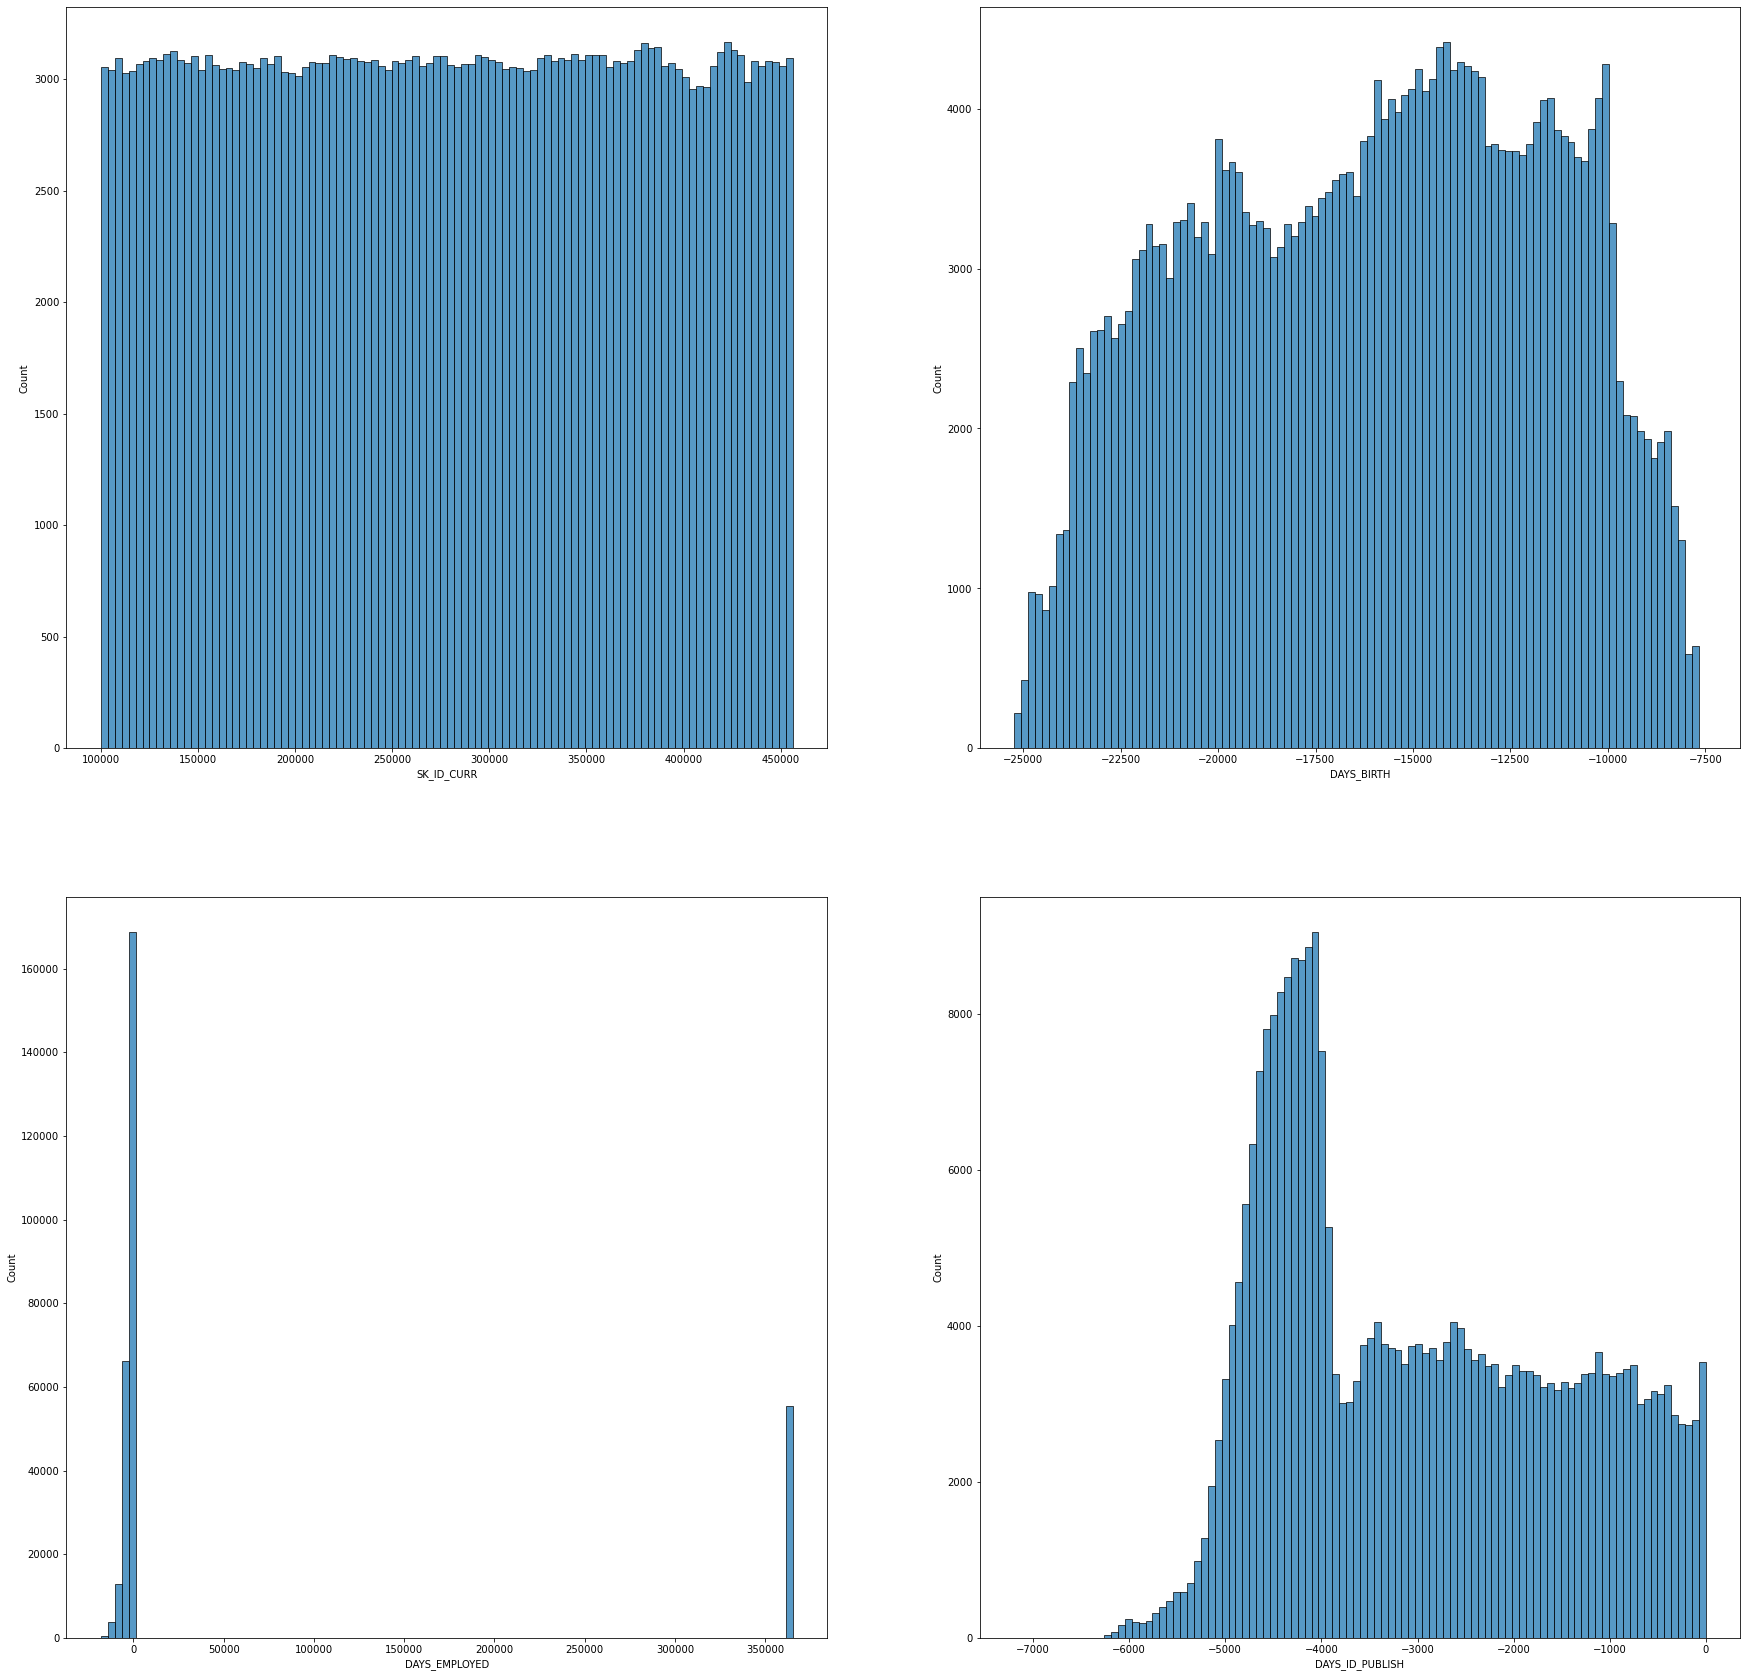

In [80]:
plt.figure(figsize=(30,30))
for i,j in enumerate(cols_for_hist):
    plt.subplot(2,2,i+1)
    sns.histplot(train_df[j],bins=100)
#     plt.hist(train_df[j])
plt.show()

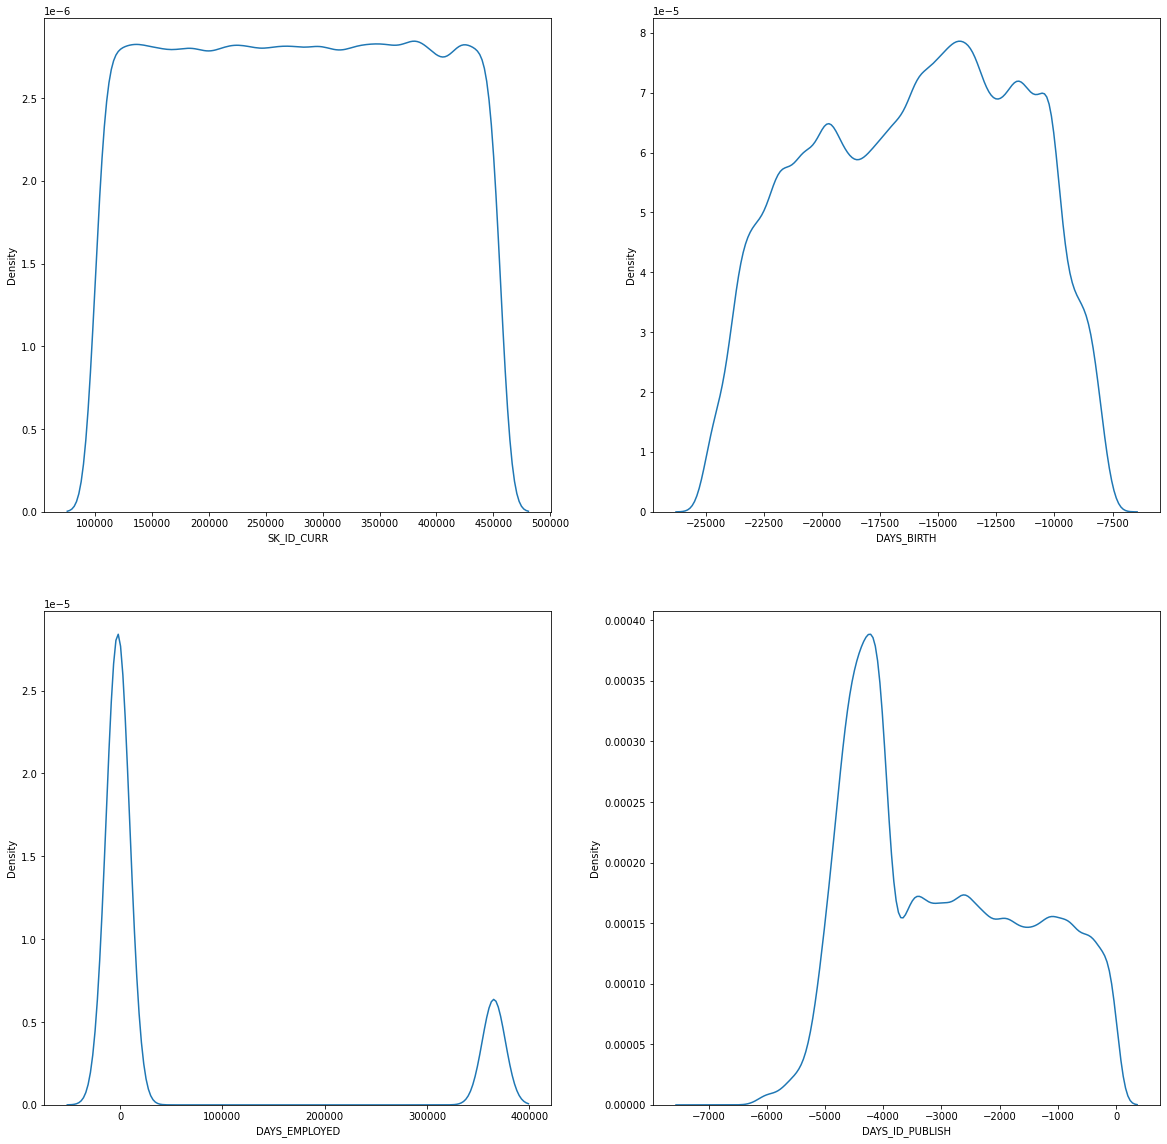

In [41]:
plt.figure(figsize=(20,20))
for i,j in enumerate(cols_for_hist):
    plt.subplot(2,2,i+1)
    sns.kdeplot(train_df[j])
#     plt.hist(train_df[j])
plt.show()

In [70]:
# float_cols_name.shape

In [71]:
# for i,j in enumerate(float_cols_name):
#     plt.figure(figsize=(10,10))
#     plt.subplot(33,2,i+1)
#     sns.kdeplot(train_df[j])
# plt.show() 

In [76]:
train_df[train_df.columns[train_df.dtypes == 'int64']].isna().sum()

SK_ID_CURR                     0
TARGET                         0
CNT_CHILDREN                   0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
FLAG_DOCUMENT_2                0
FLAG_DOCUMENT_3                0
FLAG_DOCUMENT_4                0
FLAG_DOCUMENT_5                0
FLAG_DOCUMENT_6                0
FLAG_DOCUMENT_7                0
FLAG_DOCUMENT_8                0
FLAG_DOCUMENT_9                0
FLAG_DOCUMENT_10               0
FLAG_DOCUM

<p>Looks like none of the int columns are NaN</p>

In [77]:
train_df[train_df.columns[train_df.dtypes == 'float64']].isna().sum()

AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
REGION_POPULATION_RELATIVE        0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 65, dtype: int64

In [78]:
print(float_cols_name)

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI'